<a href="https://colab.research.google.com/github/anpaschool/deep-learning/blob/master/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net in TensorFlow 2.0

For classifying MNIST digits. 

_Remember to change your Runtime to GPU or TPU._

#### Intall Tensorflow

In [22]:
#pip install tensorflow==2.0.0-beta0
#pip install --upgrade tensorflow==2.0.0-beta0

In [23]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import time

In [53]:
sns.set()
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [54]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
sklearn 0.20.1
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [55]:
!pip freeze | grep tensorflow

tensorflow==2.0.0b0
tensorflow-estimator==1.13.0


#### Load data

In [27]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

##### What are the shape of the data?

In [28]:
print(X_train.shape, y_train.shape,X_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- There are 60,000 Train data which are 28 by 28 pixcel images and 
- There are 10,000 Train data which are also 28 by 28 pixcel images

#### Data Visualization

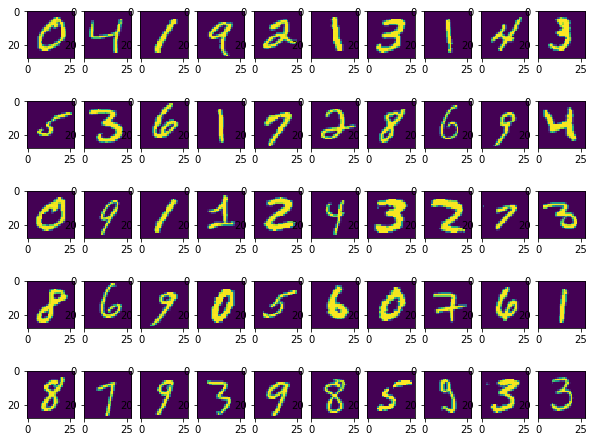

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [10,8])
for i in range(1,51):
    plt.subplot(5,10,i)
    plt.imshow(X_train[i].reshape(28,28))
plt.show()

In [30]:
y_train[1:26]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2], dtype=uint8)

#### Preprocess data

We flaten the data (from 28 by 28 to 784) before it is feed into the model. We can also create a layer as a front layer to perform this flattening step.

In [31]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

#### Data Normalization
This step converts the pixcel value ranging from 0 to 255 into 0 to 1.

In [32]:
X_train /= 255
X_valid /= 255

#### Prepare Labels
We convert label 1,2,3,4,5,6,7,8,9 in label vectors

In [33]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [34]:
y_train[1:16]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

#### Design neural network architecture

After the pixels are flattened, the network consists of a sequence of two ```tf.keras.layers.Dense``` layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 64 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

```
model
   = keras.models.sequential([
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...)
   ])  
```

In [35]:
model = keras.models.Sequential([
    
    
    keras.layers.Dense(64,\
                       activation='sigmoid',\
                       input_shape=(784,)),
    
    keras.layers.Dense(10,\
                       activation='softmax')
    
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [37]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [38]:
(784*64)+ 64, (64*10)+10

(50240, 650)

#### Configure model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- ```Loss function``` —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- ```Optimizer``` —This is how the model is updated based on the data it sees and its loss function.
- ```Metrics``` —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [39]:
model.compile(loss='categorical_crossentropy',\
              optimizer='adam',\
              metrics=['accuracy'])

#### Train!

Now your model is ready to be trained. Call its `fit()` method, passing it the input features (`X_train`) and the target classes (`y_train`). Set `epochs=10` (or else it will just run for a single epoch). You can also (optionally) pass the validation data by setting `validation_data=(X_valid, y_valid)`. If you do, Keras will compute the loss and the additional metrics (the accuracy in this case) on the validation set at the end of each epoch. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a mismatch between the training set and the validation set).
**Note**: the `fit()` method will return a `History` object containing training stats. Make sure to preserve it (`history = model.fit(...)`).

In [45]:
history = model.fit(X_train, y_train,\
          batch_size=128,\
          epochs=10,\
          verbose=1,\
          validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1051 - accuracy: 0.9707 - val_loss: 0.1200 - val_accuracy: 0.9641
Epoch 2/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0973 - accuracy: 0.9732 - val_loss: 0.1133 - val_accuracy: 0.9649
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0904 - accuracy: 0.9752 - val_loss: 0.1092 - val_accuracy: 0.9672
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0843 - accuracy: 0.9773 - val_loss: 0.1047 - val_accuracy: 0.9689
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0786 - accuracy: 0.9789 - val_loss: 0.1019 - val_accuracy: 0.9680
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0737 - accuracy: 0.9800 - val_loss: 0.0997 - val_accuracy: 0.9697
Epoch 7/10
60000/60000 [==============================] 

##### Plot History

Try running `pd.DataFrame(history.history).plot()` to plot the learning curves. To make the graph more readable, you can also set `figsize=(8, 5)`, call `plt.grid(True)` and `plt.gca().set_ylim(0, 1)`.

In [41]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

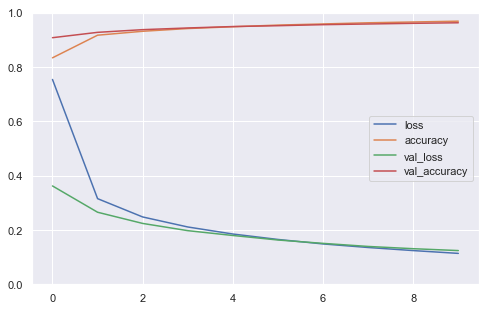

In [44]:
plot_learning_curves(history)

#### Performing Inference

Call the model's `evaluate()` method, passing it the test set (`X_test` and `y_test`). This will compute the loss (cross-entropy) on the test set, as well as all the additional metrics (in this case, the accuracy). Your model should achieve over 80% accuracy on the test set.

In [46]:
model.evaluate(X_train, y_train)

60000/60000 [==============================] - 1s 18us/sample - loss: 0.0519 - accuracy: 0.9872


[0.051851865920548634, 0.98723334]

In [56]:
valid_0 = X_valid[0].reshape(1, 784)

In [57]:
model.predict(valid_0)

array([[2.8813774e-09, 3.8345047e-10, 1.1818415e-04, 2.0551306e-06,
        2.2122413e-11, 1.7986340e-09, 1.0651025e-13, 9.9987960e-01,
        1.7287803e-08, 1.0190855e-07]], dtype=float32)

In [58]:
model.predict_classes(valid_0)

array([7])

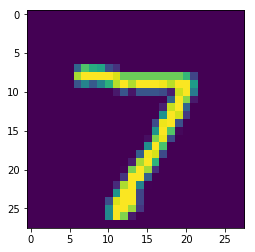

In [59]:
plt.imshow(valid_0.reshape(28,28))

Define `X_new` as the first 10 instances of the test set. Call the model's `predict()` method to estimate the probability of each class for each instance (for better readability, you may use the output array's `round()` method):

In [47]:
n_new = 10
X_new = X_train[:n_new]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Often, you may only be interested in the most likely class. Use `np.argmax()` to get the class ID of the most likely class for each instance. **Tip**: you want to set `axis=1`.

In [48]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

Call the model's `predict_classes()` method for `X_new`. You should get the same result as above.

In [49]:
y_pred = model.predict_classes(X_new)
y_pred

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

(Optional) It is often useful to know how confident the model is for each prediction. Try finding the estimated probability for each predicted class using `np.max()`.

In [50]:
y_proba.max(axis=1).round(2)

array([0.99, 1.  , 0.99, 1.  , 0.99, 1.  , 1.  , 1.  , 1.  , 1.  ],
      dtype=float32)

(Optional) It is frequent to want the top k classes and their estimated probabilities rather just the most likely class. You can use `np.argsort()` for this.

In [51]:
k = 3
top_k = np.argsort(-y_proba, axis=1)[:, :k]
top_k

array([[5, 3, 1],
       [0, 5, 2],
       [4, 2, 7],
       [1, 2, 7],
       [9, 4, 7],
       [2, 8, 9],
       [1, 8, 3],
       [3, 9, 8],
       [1, 9, 7],
       [4, 5, 6]])

In [52]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
y_proba[row_indices, top_k].round(2)

array([[0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]], dtype=float32)